In [1]:
import networkx as nx
import planarity as pl
import matplotlib.pyplot as plt

from collections import deque


In [2]:
edges = {
    'k3': [(1,2), (1,3), (2,3)],
    'k5': [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)],
    'k8': [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (3, 4),
           (3, 5), (3, 6), (3, 7), (3, 8), (4, 5), (4, 6), (4, 7), (4, 8), (5, 6), (5, 7), (5, 8), (6, 7), (6, 8), (7, 8)],
    'k9': [(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8),
           (2, 9), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (5, 6), (5, 7),
           (5, 8), (5, 9), (6, 7), (6, 8), (6, 9), (7, 8), (7, 9), (8, 9)],
    'g1': [(1, 2), (1, 10), (1, 16), (1, 19), (1, 20), (1, 21), (1, 25), (1, 30), (1, 31), (2, 10), (2, 17), (2, 19), (2, 20),
           (2, 21), (2, 25), (2, 29), (2, 30), (2, 31), (3, 5), (3, 6), (3, 7), (3, 12), (3, 16), (3, 19), (3, 21), (3, 23),
           (3, 33), (4, 8), (4, 9), (4, 11), (4, 15), (4, 23), (4, 24), (4, 26), (4, 27), (4, 28), (5, 6), (5, 7), (5, 12),
           (5, 16), (5, 19), (5, 21), (5, 23), (5, 33), (6, 7), (6, 12), (6, 16), (6, 21), (6, 23), (6, 25), (6, 31), (6, 33),
           (7, 12), (7, 16), (7, 19), (7, 21), (7, 23), (7, 33), (8, 9), (8, 11), (8, 15), (8, 18), (8, 24), (8, 27), (8, 28),
           (9, 11), (9, 15), (9, 16), (9, 24), (9, 26), (9, 27), (9, 28), (10, 19), (10, 20), (10, 21), (10, 23), (10, 25),
           (10, 30), (10, 31), (11, 15), (11, 18), (11, 24), (11, 27), (11, 28), (12, 16), (12, 19), (12, 20), (12, 23),
           (12, 33), (13, 14), (13, 17), (13, 18), (13, 22), (13, 23), (13, 26), (13, 29), (13, 32), (14, 16), (14, 17),
           (14, 18), (14, 22), (14, 26), (14, 29), (14, 32), (15, 18), (15, 24), (15, 27), (15, 28), (16, 19), (16, 21),
           (16, 22), (16, 32), (16, 33), (17, 18), (17, 22), (17, 26), (17, 29), (17, 32), (18, 22), (18, 24), (18, 27),
           (18, 29), (18, 32), (19, 20), (19, 30), (19, 33), (20, 23), (20, 25), (20, 30), (20, 31), (21, 23), (21, 25),
           (21, 30), (21, 31), (21, 33), (22, 26), (22, 29), (22, 32), (23, 25), (23, 26), (23, 28), (23, 30), (23, 31),
           (23, 33), (24, 27), (24, 28), (25, 30), (25, 31), (26, 28), (26, 29), (26, 32), (27, 28), (29, 32), (30, 31)],
    'g2': [(1, 5), (1, 8), (1, 14), (1, 16), (1, 17), (1, 18), (1, 20), (1, 23), (2, 6), (2, 7), (2, 13), (2, 21), (2, 22),
           (2, 26), (2, 31), (2, 32), (2, 33), (3, 4), (3, 6), (3, 9), (3, 15), (3, 16), (3, 18), (3, 25), (3, 27),
           (3, 30), (4, 6), (4, 9), (4, 15), (4, 18), (4, 20), (4, 25), (4, 27), (4, 30), (5, 8), (5, 14), (5, 16), (5, 17),
           (5, 18), (5, 20), (5, 23), (6, 7), (6, 9), (6, 13), (6, 15), (6, 21), (6, 27), (6, 30), (6, 31), (6, 32), (6, 33),
           (7, 13), (7, 21), (7, 22), (7, 24), (7, 29), (7, 32), (7, 33), (8, 14), (8, 16), (8, 17), (8, 18), (8, 20),
           (8, 23), (9, 15), (9, 16), (9, 18), (9, 25), (9, 27), (9, 30), (10, 11), (10, 12), (10, 19), (10, 21), (10, 24),
           (10, 26), (10, 28), (10, 29), (10, 31), (11, 12), (11, 19), (11, 21), (11, 24), (11, 26), (11, 28), (11, 29),
           (11, 31), (12, 19), (12, 24), (12, 26), (12, 28), (12, 29), (12, 31), (12, 32), (13, 21), (13, 22), (13, 24),
           (13, 31), (13, 32), (13, 33), (14, 15), (14, 16), (14, 17), (14, 20), (14, 22), (14, 23), (14, 24), (15, 16),
           (15, 25), (15, 27), (15, 30), (16, 17), (16, 22), (16, 23), (16, 24), (16, 25), (16, 27), (17, 18), (17, 20),
           (17, 23), (18, 20), (18, 23), (18, 25), (18, 27), (18, 30), (19, 24), (19, 26), (19, 28), (19, 29), (19, 31),
           (19, 32), (20, 23), (20, 30), (21, 22), (21, 26), (21, 28), (21, 29), (21, 33), (22, 24), (22, 25), (22, 31),
           (22, 32), (22, 33), (24, 25), (24, 28), (24, 29), (24, 31), (24, 32), (24, 33), (25, 27), (25, 30), (26, 28),
           (26, 29), (26, 31), (27, 30), (28, 29), (28, 31), (29, 33), (31, 32), (32, 33)],
    'g3': [(1, 3), (1, 4), (1, 5), (1, 8), (1, 14), (1, 18), (1, 21), (1, 22), (1, 24), (2, 3), (2, 6), (2, 7), (2, 9), (2, 11),
           (2, 13), (2, 16), (2, 21), (2, 24), (3, 4), (3, 5), (3, 6), (3, 8), (3, 9), (3, 11), (3, 12), (3, 14), (3, 15),
           (3, 18), (3, 19), (3, 21), (3, 23), (3, 24), (3, 25), (4, 5), (4, 8), (4, 11), (4, 13), (4, 14), (4, 16), (4, 18),
           (4, 22), (5, 8), (5, 14), (5, 16), (5, 18), (5, 21), (5, 22), (6, 7), (6, 9), (6, 11), (6, 13), (6, 16), (6, 21),
           (6, 24), (7, 9), (7, 11), (7, 13), (7, 16), (7, 21), (7, 22), (7, 24), (8, 14), (8, 16), (8, 18), (8, 21), (8, 22),
           (9, 11), (9, 13), (9, 16), (9, 21), (9, 24), (10, 12), (10, 13), (10, 15), (10, 17), (10, 19), (10, 20), (10, 23),
           (10, 25), (11, 13), (11, 16), (11, 24), (12, 15), (12, 17), (12, 19), (12, 20), (12, 23), (12, 25), (13, 16),
           (13, 17), (13, 20), (13, 24), (14, 16), (14, 18), (14, 21), (14, 22), (15, 17), (15, 19), (15, 20), (15, 23),
           (15, 25), (16, 22), (17, 19), (17, 20), (17, 23), (17, 25), (18, 21), (18, 22), (18, 24), (19, 20), (19, 23),
           (19, 25), (20, 23), (20, 25), (21, 22), (21, 24), (23, 25)],
    'g4': [(1, 2), (1, 4), (1, 5), (1, 6), (1, 10), (1, 16), (1, 23), (1, 24), (1, 25), (2, 7), (2, 8), (2, 9), (2, 10),
           (2, 12), (2, 13), (2, 18), (2, 19), (2, 24), (3, 11), (3, 15), (3, 17), (3, 18), (3, 20), (3, 21), (3, 22),
           (3, 25), (4, 5), (4, 6), (4, 10), (4, 14), (4, 16), (4, 23), (4, 24), (4, 25), (5, 6), (5, 10), (5, 14), (5, 16),
           (5, 18), (5, 23), (5, 24), (6, 9), (6, 10), (6, 14), (6, 16), (6, 18), (6, 19), (6, 23), (7, 8), (7, 9), (7, 12),
           (7, 13), (7, 14), (7, 19), (7, 24), (7, 25), (8, 9), (8, 12), (8, 13), (8, 14), (8, 19), (8, 24), (8, 25), (9, 12),
           (9, 13), (9, 14), (9, 19), (9, 25), (10, 16), (10, 18), (10, 23), (10, 24), (11, 15), (11, 17), (11, 18), (11, 20),
           (11, 21), (11, 22), (11, 25), (12, 13), (12, 14), (12, 19), (12, 24), (12, 25), (13, 14), (13, 16), (13, 19),
           (13, 24), (14, 16), (14, 19), (14, 23), (14, 25), (15, 17), (15, 18), (15, 20), (15, 21), (15, 22), (15, 25),
           (16, 23), (16, 24), (17, 18), (17, 20), (17, 21), (17, 22), (17, 25), (18, 19), (18, 20), (18, 21), (18, 22),
           (20, 21), (20, 22), (20, 25), (21, 22), (21, 25), (22, 25), (23, 24), (23, 25)],
    'mg1': [(1, 13), (1, 14), (1, 15), (2, 13), (2, 14), (2, 15), (3, 13), (3, 14), (3, 15), (1, 2), (1, 3), (2, 3), (4, 5),
            (4, 6), (5, 6), (7, 8), (7, 9), (8, 9), (10, 11), (10, 12), (11, 12), (13, 14), (13, 15), (14, 15), (1, 4),
            (1, 5), (1, 6), (2, 4), (2, 5), (2, 6), (3, 4), (3, 5), (3, 6), (4, 7), (4, 8), (4, 9), (5, 7), (5, 8), (5, 9),
            (6, 7), (6, 8), (6, 9), (7, 10), (7, 11), (7, 12), (8, 10), (8, 11), (8, 12), (9, 10), (9, 11), (9, 12), (10, 13),
            (10, 14), (10, 15), (11, 13), (11, 14), (11, 15), (12, 13), (12, 14), (12, 15)],
    'mg2': [(1, 17), (1, 18), (1, 19), (2, 17), (2, 18), (2, 19), (3, 17), (3, 18), (3, 19), (4, 17), (4, 18), (4, 19),
            (17, 18), (17, 19), (18, 19), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (5, 6), (5, 7), (5, 8), (6, 7),
            (6, 8), (7, 8), (9, 10), (9, 11), (9, 12), (10, 11), (10, 12), (11, 12), (13, 14), (13, 15), (13, 16), (14, 15),
            (14, 16), (15, 16), (13, 17), (13, 18), (13, 19), (14, 17), (14, 18), (14, 19), (15, 17), (15, 18), (15, 19),
            (16, 17), (16, 18), (16, 19), (1, 5), (1, 6), (1, 7), (1, 8), (2, 5), (2, 6), (2, 7), (2, 8), (3, 5), (3, 6),
            (3, 7), (3, 8), (4, 5), (4, 6), (4, 7), (4, 8), (5, 9), (5, 10), (5, 11), (5, 12), (6, 9), (6, 10), (6, 11),
            (6, 12), (7, 9), (7, 10), (7, 11), (7, 12), (8, 9), (8, 10), (8, 11), (8, 12), (9, 13), (9, 14), (9, 15), (9, 16),
            (10, 13), (10, 14), (10, 15), (10, 16), (11, 13), (11, 14), (11, 15), (11, 16), (12, 13), (12, 14), (12, 15),
            (12, 16)],
    'mg3': [(1, 25), (1, 26), (1, 27), (1, 28), (2, 25), (2, 26), (2, 27), (2, 28), (3, 25), (3, 26), (3, 27), (3, 28),
            (4, 25), (4, 26), (4, 27), (4, 28), (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (5, 6), (5, 7), (5, 8),
            (6, 7), (6, 8), (7, 8), (9, 10), (9, 11), (9, 12), (10, 11), (10, 12), (11, 12), (13, 14), (13, 15), (13, 16),
            (14, 15), (14, 16), (15, 16), (17, 18), (17, 19), (17, 20), (18, 19), (18, 20), (19, 20), (21, 22), (21, 23),
            (21, 24), (22, 23), (22, 24), (23, 24), (25, 26), (25, 27), (25, 28), (26, 27), (26, 28), (27, 28), (1, 5), (1, 6),
            (1, 7), (1, 8), (2, 5), (2, 6), (2, 7), (2, 8), (3, 5), (3, 6), (3, 7), (3, 8), (4, 5), (4, 6), (4, 7), (4, 8),
            (5, 9), (5, 10), (5, 11), (5, 12), (6, 9), (6, 10), (6, 11), (6, 12), (7, 9), (7, 10), (7, 11), (7, 12),
            (8, 9), (8, 10), (8, 11), (8, 12), (9, 13), (9, 14), (9, 15), (9, 16), (10, 13), (10, 14), (10, 15), (10, 16),
            (11, 13), (11, 14), (11, 15), (11, 16), (12, 13), (12, 14), (12, 15), (12, 16), (13, 17), (13, 18), (13, 19),
            (13, 20), (14, 17), (14, 18), (14, 19), (14, 20), (15, 17), (15, 18), (15, 19), (15, 20), (16, 17), (16, 18),
            (16, 19), (16, 20), (17, 21), (17, 22), (17, 23), (17, 24), (18, 21), (18, 22), (18, 23), (18, 24), (19, 21),
            (19, 22), (19, 23), (19, 24), (20, 21), (20, 22), (20, 23), (20, 24), (21, 25), (21, 26), (21, 27), (21, 28),
            (22, 25), (22, 26), (22, 27), (22, 28), (23, 25), (23, 26), (23, 27), (23, 28), (24, 25), (24, 26), (24, 27),
            (24, 28)],
#     'mg4': [(1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), 

# (5, 6), (5, 7), (5, 8), (6, 7), (6, 8), (7, 8), 

# (9, 10), (9, 11), (9, 12), (10, 11), (10, 12), (11, 12), 

# (13, 14), (13, 15), (13, 16), (14, 15), (14, 16), (15, 16), 

# (17, 18), (17, 19), (17, 20), (18, 19), (18, 20), (19, 20), 

# (21, 22), (21, 23),(21, 24), (22, 23), (22, 24), (23, 24), 

# (25, 26), (25, 27), (25, 28), (26, 27), (26, 28), (27, 28), 


# (1, 25), (1, 26), (1, 27), (1, 28), 
# (2, 25), (2, 26), (2, 27), (2, 28), 
# (3, 25), (3, 26), (3, 27), (3, 28),
# (4, 25), (4, 26), (4, 27), (4, 28), 
# (1, 5), (1, 6),(1, 7), (1, 8), (2, 5), (2, 6), (2, 7), (2, 8), (3, 5), (3, 6), (3, 7), (3, 8), (4, 5), (4, 6), (4, 7), (4, 8),
# (5, 9), (5, 10), (5, 11), (5, 12), (6, 9), (6, 10), (6, 11), (6, 12), (7, 9), (7, 10), (7, 11), (7, 12),
# (8, 9), (8, 10), (8, 11), (8, 12), (9, 13), (9, 14), (9, 15), (9, 16), (10, 13), (10, 14), (10, 15), (10, 16),
# (11, 13), (11, 14), (11, 15), (11, 16), (12, 13), (12, 14), (12, 15), (12, 16), (13, 17), (13, 18), (13, 19),
# (13, 20), (14, 17), (14, 18), (14, 19), (14, 20), (15, 17), (15, 18), (15, 19), (15, 20), (16, 17), (16, 18),
# (16, 19), (16, 20), (17, 21), (17, 22), (17, 23), (17, 24), (18, 21), (18, 22), (18, 23), (18, 24), (19, 21),
# (19, 22), (19, 23), (19, 24), (20, 21), (20, 22), (20, 23), (20, 24), (21, 25), (21, 26), (21, 27), (21, 28),
# (22, 25), (22, 26), (22, 27), (22, 28), (23, 25), (23, 26), (23, 27), (23, 28), (24, 25), (24, 26), (24, 27),
# (24, 28)]
}

In [3]:
for k, es in edges.items():
    print(k, len(es))

k3 3
k5 10
k8 28
k9 36
g1 154
g2 160
g3 117
g4 117
mg1 60
mg2 99
mg3 154


In [4]:

graphs = {k: nx.Graph() for k in edges.keys()}
for g, es in edges.items():
    for e in es:
        graphs[g].add_edge(e[0], e[1])

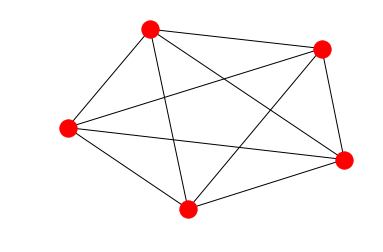

In [5]:
plt.subplot()
nx.draw(graphs['k5'])
plt.show()

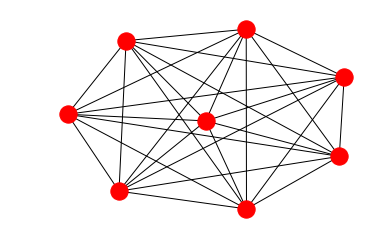

In [6]:
plt.subplot()
nx.draw(graphs['k8'])
plt.show()

In [7]:
pl.is_planar(graphs['k5'])

False

In [8]:
pl.is_planar(graphs['k3'])

True

In [9]:
def thickness(g):
    # Insert into graph until not planar, then move onto next graph
    vs = set()
    gs = []
    current = nx.Graph()
    for e in g.edges():
        vs.add(e[0])
        vs.add(e[1])
    
    for v in vs:
        current.add_node(v)
    
    for e in g.edges():
        current.add_edge(e[0], e[1])
        if not pl.is_planar(current):
            current.remove_edge(e[0], e[1])
            gs.append(current)
            current = nx.Graph()
            for v in vs:
                current.add_node(v)
            current.add_edge(e[0], e[1])
    gs.append(current)

    return gs

In [10]:
def thickness2(g):
    # Insert by first graph that is still planar after addition
    vs = set()
    gs = [nx.Graph()]
    for e in g.edges():
        vs.add(e[0])
        vs.add(e[1])
    
    for v in vs:
        gs[0].add_node(v)

    for e in g.edges():
        added = False
        for current in gs:
            current.add_edge(e[0], e[1])
            if pl.is_planar(current):
                added = True
                break
            else:
                current.remove_edge(e[0], e[1])
        
        if not added:
            ng = nx.Graph()
            for v in vs:
                ng.add_node(v)
            ng.add_edge(e[0], e[1])
            gs.append(ng)

    return gs

In [11]:
def thickness3(g):
    # Insert by min size graph
    vs = set()
    gs = [nx.Graph()]
    glens = [(0, 0)]
    for e in g.edges():
        vs.add(e[0])
        vs.add(e[1])
    
    for v in vs:
        gs[0].add_node(v)
    
    for e in g.edges():
        added = False
        glens.sort()
        for gli, (l, i) in enumerate(glens):
            current = gs[i]

            current.add_edge(e[0], e[1])
            if pl.is_planar(current):
                added = True
                glens[gli] = (l+1, i)
                break
            else:
                current.remove_edge(e[0], e[1])
        
        if not added:
            ng = nx.Graph()
            for v in vs:
                ng.add_node(v)
            ng.add_edge(e[0], e[1])
            gs.append(ng)
            glens.append((1, len(gs)-1))

    return gs

In [12]:
def best_thickness(g):
    decomps1 = thickness(g)
    decomps2 = thickness2(g)
    decomps3 = thickness3(g)

    l1 = len(decomps1)
    l2 = len(decomps2)
    l3 = len(decomps3)
    return min(l1, l2, l3)

In [13]:
def thickness4(g):
    # Rotational assignment of edges to one fewer graphs than best known thickness
    best = best_thickness(g)
    if best == 1:
        return thickness2(g)

    gs = [nx.Graph() for _ in range(best-1)]
    gedges = [e for e in g.edges()]
    gedges.sort()
    
    vs = set()
    for e in g.edges():
        vs.add(e[0])
        vs.add(e[1])
    
    for v in vs:
        for cur in gs:
            cur.add_node(v)

    not_added = []
    for i, edge in enumerate(gedges):
        gi = i % len(gs)
        gs[gi].add_edge(edge[0], edge[1])
        if not pl.is_planar(gs[gi]):
            not_added.append(edge)
            gs[gi].remove_edge(edge[0], edge[1])
    
    not_added_again = []
    for e in not_added:
        added = False
        for gcur in gs:
            gcur.add_edge(e[0], e[1])
            if pl.is_planar(gcur):
                added = True
                break
            else:
                gcur.remove_edge(e[0], e[1])
                
        if not added:
            not_added_again.append(e)

    if len(not_added_again) > 0:
        return thickness2(g)
    
    return gs
        

In [14]:
def thickness5(g):
    # Like 4 but always assign rather than skipping ahead when an edge makes it non planar
    best = best_thickness(g)
    if best == 1:
        return thickness4(g)

    gs = [nx.Graph() for _ in range(best-1)]
    gedges = [e for e in g.edges()]
    gedges.sort()

    vs = set()
    for e in g.edges():
        vs.add(e[0])
        vs.add(e[1])
    
    for v in vs:
        for cur in gs:
            cur.add_node(v)

    not_added = []
    for i, edge in enumerate(gedges):
        gi = (i - len(not_added)) % len(gs)
        gs[gi].add_edge(edge[0], edge[1])
        if not pl.is_planar(gs[gi]):
            not_added.append(edge)
            gs[gi].remove_edge(edge[0], edge[1])
    
    not_added_again = []
    for e in not_added:
        added = False
        for gcur in gs:
            gcur.add_edge(e[0], e[1])
            if pl.is_planar(gcur):
                added = True
                break
            else:
                gcur.remove_edge(e[0], e[1])
                
        if not added:
            not_added_again.append(e)

    if len(not_added_again) > 0:
        return thickness4(g)
    
    return gs


In [15]:
def thickness6(g):
    # Rotational assignment of edges to one fewer graphs than best known thickness
    bestg = thickness4(g)
    best = len(bestg)
    if best == 1:
        return bestg

    gs = [nx.Graph() for _ in range(best-1)]
    gedges = [e for e in g.edges()]
    gedges.sort()

    vs = set()
    for e in g.edges():
        vs.add(e[0])
        vs.add(e[1])
    
    for v in vs:
        for cur in gs:
            cur.add_node(v)

    not_added = []
    for i, edge in enumerate(gedges):
        gi = i % len(gs)
        gs[gi].add_edge(edge[0], edge[1])
        if not pl.is_planar(gs[gi]):
            not_added.append(edge)
            gs[gi].remove_edge(edge[0], edge[1])
    
    not_added_again = []
    for e in not_added:
        added = False
        for gcur in gs:
            gcur.add_edge(e[0], e[1])
            if pl.is_planar(gcur):
                added = True
                break
            else:
                gcur.remove_edge(e[0], e[1])
                
        if not added:
            not_added_again.append(e)

    if len(not_added_again) > 0:
        return thickness2(g)
    
    return gs
        

In [16]:
def compress_decompositions(decomps):
    if len(decomps) < 2:
        return decomps
    new_decomps = [nx.Graph() for _ in range(len(decomps) - 1)]
    min_decomp = decomps[-1]

    # Add all last graph edges to new first decomp
    for e in min_decomp.edges():
        new_decomps[0].add_edge(e[0], e[1])
    
    notAdded = []
    for i, decomp in enumerate(decomps[:-1]):
        for e in decomp.edges():
            new_decomps[i].add_edge(e[0], e[1])
            if not pl.is_planar(new_decomps[i]):
                new_decomps[i].remove_edge(e[0], e[1])
                notAdded.append(e)
    
    for e in notAdded:
        added = False
        for g in new_decomps[1:]:
            g.add_edge(e[0], e[1])
            if not pl.is_planar(g):
                g.remove_edge(e[0], e[1])
            else:
                added = True
                break
        
        if not added:
            return decomps
    
    return new_decomps

In [17]:
def add_all_vertices(g, vs):
    for v in vs:
        g.add_node(v)


In [38]:
def add_edge(g, e):
    g.add_edge(*e)
    if pl.is_planar(g):
        return True
    g.remove_edge(e[0], e[1])
    return False

In [19]:
def connect_vertex(g, e):
    if nx.has_path(g, e[0], e[1]):
        return False
    return add_edge(g, e)

In [31]:
def make_tree(g, es):
    not_added = []
    for e in es:
        if not connect_vertex(g, e):
            not_added.append(e)
    
    return not_added

In [76]:
def connect_length(g, es, l=2):
    print ("Connect length...")
    ges = [e for e in g.edges()]
    print(es, ges)
    if len(es) == 0:
        return []
    added = []
    max_len = 0
    for v, paths in nx.all_pairs_shortest_path(g):
        print (paths)
        for u, path in paths.items():
            if u == v:
                continue
            target_e = (min(u, v), max(u, v))
            print(target_e, es, path, 'Yes' if target_e in es else 'No', len(path), l+1)
            max_len = max(max_len, len(path))
            if len(path) == l+1 and target_e in es:
                if add_edge(g, target_e):
                    es.remove(target_e)
                    added.append(target_e)
    
    if len(added) > 0:
        # Edges have been added, so lengths have changed, try adding at min length again
        not_added = [e for e in es if e not in added]
        if len(not_added) == 0:
            return []
        return connect_length(g, not_added, 2)
    elif max_len > l:
        # No additions at this length, but longer paths exist
        return connect_length(g, es, l+1)
    else:
        return es


In [74]:
def thickness7(g):
    # Create tree before adding any other edges
    gs = []
    vs = set()
    for v in g:
        print(v)
        vs.add(v)
    es = [e for e in g.edges()]

    while len(es) > 0:
        current = nx.Graph()
        add_all_vertices(current, vs)
        print("es1", es)
        es = make_tree(current, es)
        print("es2", es)
        es = connect_length(g, es, 2)
        print("es3", es)
        gs.append(current)
    
    return gs

In [44]:
decomps1 = {k: compress_decompositions(thickness(g)) for k, g in graphs.items()}
decomps2 = {k: compress_decompositions(thickness2(g)) for k, g in graphs.items()}
decomps3 = {k: compress_decompositions(thickness3(g)) for k, g in graphs.items()}
decomps4 = {k: compress_decompositions(thickness4(g)) for k, g in graphs.items()}
decomps5 = {k: compress_decompositions(thickness5(g)) for k, g in graphs.items()}
decomps6 = {k: compress_decompositions(thickness6(g)) for k, g in graphs.items()}
decomps7 = {k: compress_decompositions(thickness7(g)) for k, g in graphs.items()}

decomps = {}
for k in graphs.keys():
    l1 = len(decomps1[k])
    l2 = len(decomps2[k])
    l3 = len(decomps3[k])
    l4 = len(decomps4[k])
    l5 = len(decomps5[k])
    l6 = len(decomps6[k])
    l7 = len(decomps7[k])
    print(k, l1, l2, l3, l4, l5, l6, l7)
    ming = min(l1, l2, l3, l4, l5, l6, l7)
    if ming == l1:
        print(k, 'thickness1', l1)
        decomps[k] = decomps1[k]
    elif ming == l2:
        print(k, 'thickness2', l2)
        decomps[k] = decomps2[k]
    elif ming == l3:
        print(k, 'thickness3', l3)
        decomps[k] = decomps3[k]
    elif ming == l4:
        print(k, 'thickness4', l4)
        decomps[k] = decomps4[k]
    elif ming == l5:
        print(k, 'thickness5', l5)
        decomps[k] = decomps5[k]
    elif ming == l6:
        print(k, 'thickness6', l6)
    elif ming == l7:
        print(k, 'thickness7', l7)

k3 1 1 1 1 1 1 1
k3 thickness1 1
k5 2 2 2 2 2 2 3
k5 thickness1 2
k8 2 2 2 2 2 2 6
k8 thickness1 2
k9 3 3 3 3 3 3 7
k9 thickness1 3
g1 7 3 3 3 3 3 8
g1 thickness2 3
g2 6 3 4 3 3 3 8
g2 thickness2 3
g3 7 3 3 3 3 3 7
g3 thickness2 3
g4 6 3 3 3 3 3 7
g4 thickness2 3
mg1 4 3 3 3 3 3 7
mg1 thickness2 3
mg2 6 3 3 3 3 3 9
mg2 thickness2 3
mg3 11 3 3 3 3 3 10
mg3 thickness2 3


k3 1


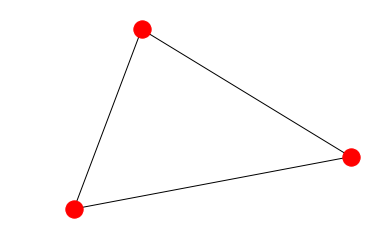

k5 2


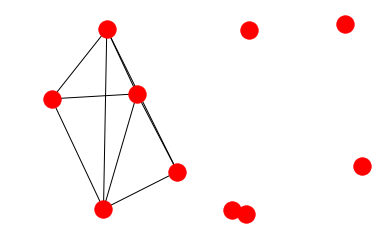

k8 2


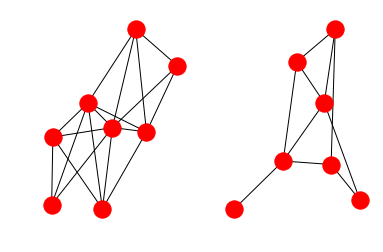

k9 3


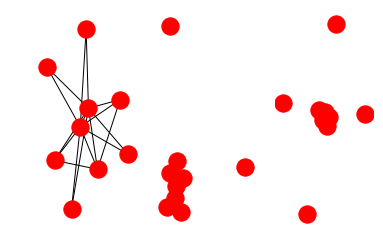

g1 3


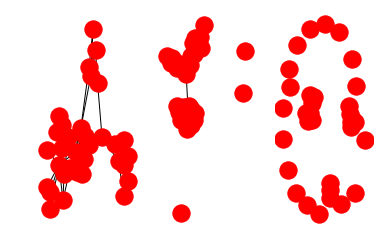

g2 3


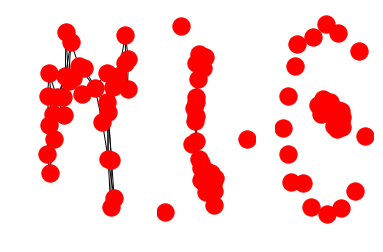

g3 3


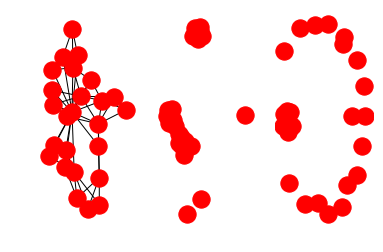

g4 3


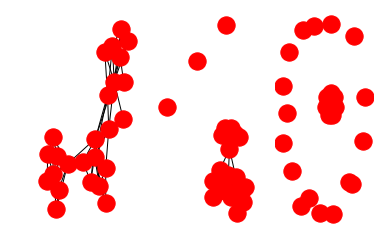

mg1 3


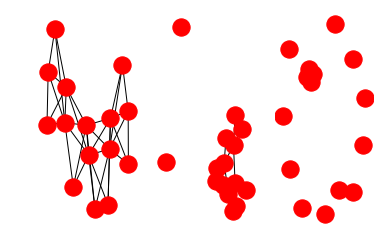

mg2 3


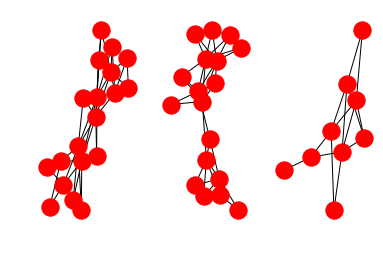

mg3 3


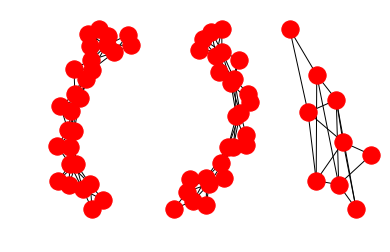

In [22]:
for k, decomp in decomps.items():
    print(k, len(decomp))
    subplot = 100 + 10*len(decomp)
    for cur in decomp:
        subplot += 1
        plt.subplot(subplot)

        nx.draw(cur)
    plt.show()

In [23]:
testings = {k: nx.Graph() for k in graphs.keys()}

for k, decomp in decomps.items():
    for cur in decomp:
        for edge in cur.edges():
            testings[k].add_edge(edge[0], edge[1])

for k, res in testings.items():
    if not nx.is_isomorphic(res, graphs[k]):
        print(k, "is not isomorphic")


In [30]:
#  for k, decomp in decomps.items():
#     print(k)
#     for cur in decomp:
#         print(len(cur.edges))
#     print('')

In [29]:
# decomp1 = decomps['mg3'][0]
# decomp2 = decomps['mg3'][1]
# decomp3 = decomps['mg3'][2]
# decomp4 = decomps['mg3'][3]

# g1 = nx.Graph()
# g2 = nx.Graph()
# g3 = nx.Graph()

# for e in decomp4.edges():
#     g1.add_edge(e[0], e[1])

# d1_remainder = []
# for e in decomp1.edges():
#     g1.add_edge(e[0], e[1])
#     if pl.is_planar(g1):
#         continue
#     else:
#         g1.remove_edge(e[0], e[1])
#         d1_remainder.append(e)
# print(len(d1_remainder))

# for e in d1_remainder:
#     decomp2.add_edge(e[0], e[1])
#     if not pl.is_planar(decomp2):
#         decomp2.remove_edge(e[0], e[1])
#     else:
#         continue
#     decomp3.add_edge(e[0], e[1])
#     if not pl.is_planar(decomp3):
#         decomp3.remove_edge(e[0], e[1])
#     else:
#         continue
        
#     print("Not working...")

1
2
3
4
5
es1 [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]
es2 [(2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]
Connect length...
[(2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)] [(1, 2), (1, 3), (1, 4), (1, 5), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)]
{1: [1], 2: [1, 2], 3: [1, 3], 4: [1, 4], 5: [1, 5]}
(1, 2) [(2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)] [1, 2] No 2 3
(1, 3) [(2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)] [1, 3] No 2 3
(1, 4) [(2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)] [1, 4] No 2 3
(1, 5) [(2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)] [1, 5] No 2 3
{2: [2], 1: [2, 1], 3: [2, 3], 4: [2, 4], 5: [2, 5]}
(1, 2) [(2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)] [2, 1] No 2 3
(2, 3) [(2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)] [2, 3] Yes 2 3
(2, 4) [(2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)] [2, 4] Yes 2 3
(2, 5) [(2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)] [2, 5] Yes 2 3
{3: [3], 1: [3, 1], 2: [3, 2], 4: [

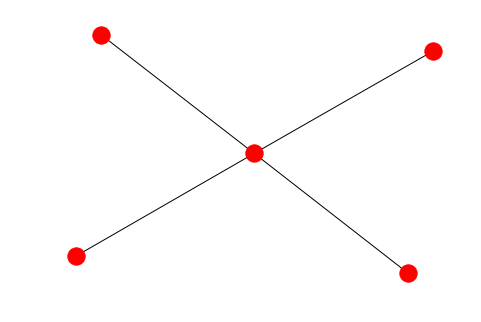

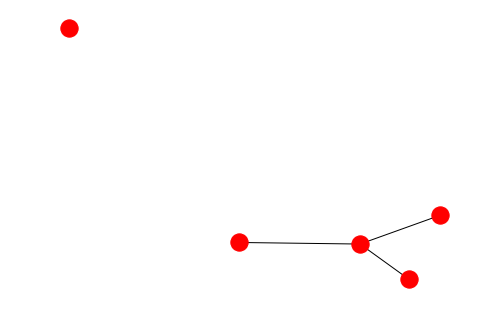

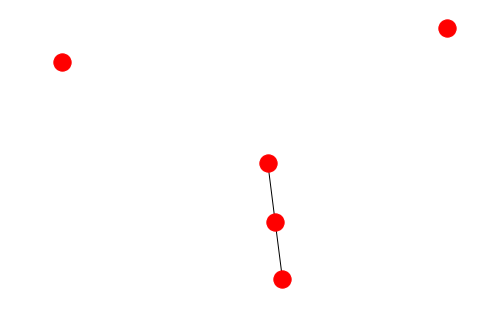

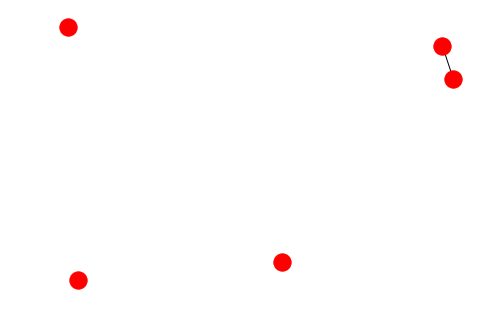

In [77]:
decomp = thickness7(graphs['k5'])
print('k5', len(decomp))
subplot = 100 + 10*len(decomp)
for cur in decomp:
    subplot += 1
    plt.figure()
    nx.draw(cur)
plt.show()